# Infected vs Smartphone (Korea)

What percentage of COVID-19 patients could an app cover?

Please direct your questions to [Bin Zhang](https://www.linkedin.com/in/binzhangmd)

In [1]:
# Mount for Colab (Optional)
COLAB = False

if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    DATASET_BASE = '/content/drive/My Drive/CovidApps/datasets/'
else:
    DATASET_BASE = '../datasets/'

DS4C_PATH = DATASET_BASE + 'coronavirusdataset/'
AGE_PATH = DS4C_PATH + 'TimeAge.csv'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Read CSV

In [3]:
LAST_UPDATE = '2020-05-14'
age = pd.read_csv(AGE_PATH)

In [4]:
age.tail(10)

,date,time,age,confirmed,deceased
656,2020-05-13,0,80s,490,125
657,2020-05-14,0,0s,143,0
658,2020-05-14,0,10s,614,0
659,2020-05-14,0,20s,3056,0
660,2020-05-14,0,30s,1202,2
661,2020-05-14,0,40s,1451,3
662,2020-05-14,0,50s,1964,15
663,2020-05-14,0,60s,1359,38
664,2020-05-14,0,70s,712,77
665,2020-05-14,0,80s,490,125


In [5]:
print(f'Date range: {len(age.date.unique())} days ({min(age.date)} ~ {max(age.date)})')
age_list = age.age.unique() # 80s := 80+
print('Age groups:', age_list)

Date range: 74 days (2020-03-02 ~ 2020-05-14)
Age groups: ['0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s']


#### Cases by Age

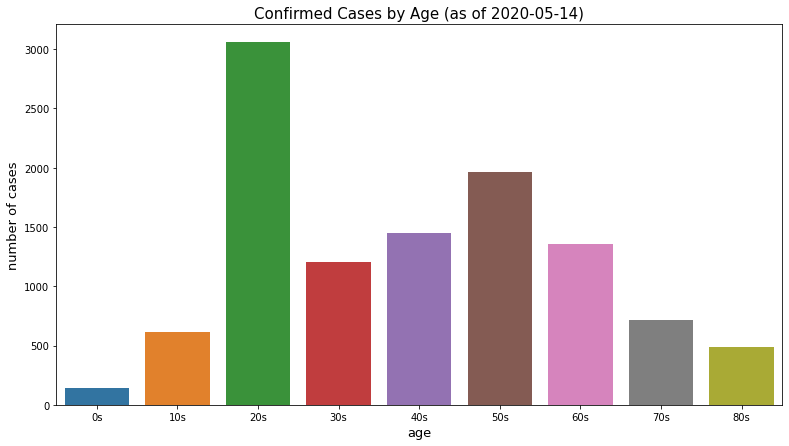

In [6]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases by Age (as of {0})'.format(LAST_UPDATE), fontsize=15)
sns.barplot(age_list, age.confirmed[-9:])
ax.set_xlabel('age', size=13)
ax.set_ylabel('number of cases', size=13)
plt.show()

#### Smartphone Penetration by Age

In [7]:
# https://www.statista.com/statistics/897195/south-korea-smartphone-ownership-by-age-group/

data = {'age': [0, 10, 20, 30, 40, 50, 60, 70, 80],
       'smartphone': [0.955, 0.955, 0.999, 0.999, 0.997, 0.984, 0.875, 0.363, 0.363]}
smartphone = pd.DataFrame(data)

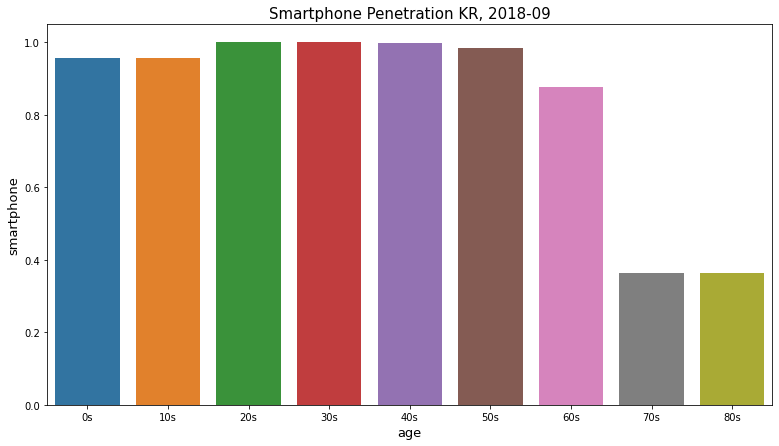

In [8]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Smartphone Penetration KR, 2018-09', fontsize=15)
sns.barplot(age_list, smartphone['smartphone'])
ax.set_xlabel('age', size=13)
ax.set_ylabel('smartphone', size=13)
plt.show()

#### Smartphone Coverage

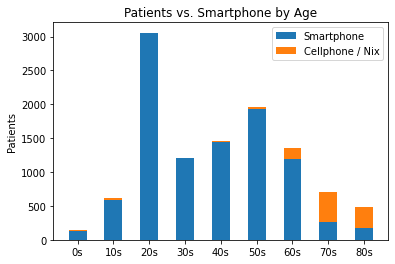

Smartphone coverage: 90.82% of infected cases


In [9]:
N = len(age_list)
groups = age.confirmed[-9:].to_numpy()
wSp = np.round(groups * smartphone['smartphone'])
woSp = np.round(groups * (1 - smartphone['smartphone']))

width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(age_list, wSp, width)
p2 = plt.bar(age_list, woSp, width,
             bottom=wSp)

plt.ylabel('Patients')
plt.title('Patients vs. Smartphone by Age')
plt.legend((p1[0], p2[0]), ('Smartphone', 'Cellphone / Nix'))

plt.show()

cover = np.sum(wSp) / (np.sum(wSp) + np.sum(woSp))
print('Smartphone coverage: ' + '{:.2%}'.format(cover) + ' of infected cases')


#### App Coverage (80% Penetation Assumption)


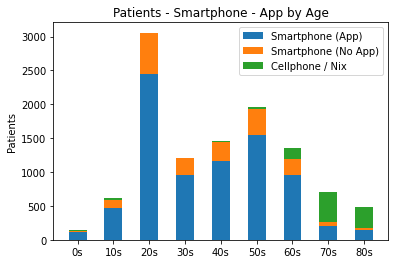

App coverage: 72.65% of infected cases


In [10]:
APP_COVERAGE = 0.8

yApp = np.round(wSp * APP_COVERAGE)
nApp = np.round(wSp * (1 - APP_COVERAGE))

width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(age_list, yApp, width)
p2 = plt.bar(age_list, nApp, width,
             bottom=yApp)
p3 = plt.bar(age_list, woSp, width,
             bottom=yApp+nApp)

plt.ylabel('Patients')
plt.title('Patients - Smartphone - App by Age')
plt.legend((p1[0], p2[0], p3[0]), ('Smartphone (App)', 'Smartphone (No App)', 'Cellphone / Nix'))

plt.show()

cover = np.sum(yApp) / (np.sum(wSp) + np.sum(woSp))
print('App coverage: ' + '{:.2%}'.format(cover) + ' of infected cases')
